# Multivariate Linear Regression with Scikit-learn
## Objective
The goal of this notebook is to build and evaluate a multivariate linear regression model using the industry-standard scikit-learn library. We will predict California housing prices based on multiple features and measure the model's performance on unseen data.



## Step 1: Setup & Data Loading

- Import the necessary libraries: numpy, matplotlib.pyplot, and sklearn.
- Load the California Housing dataset into a pandas DataFrame.
- Separate the data into features (X) and the target variable (y).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
import sys
import os
sys.path.append('../../src')
from utils.plotting_utils import plot_all_features
np.set_printoptions(precision=2)

In [153]:
housing = fetch_california_housing()

In [154]:
X = housing.data
y = housing.target

## Step 2: Train/Test Split

- Split the dataset into a training set (80%) and a testing set (20%) using train_test_split.
- This is a crucial step to ensure we can evaluate our model on data it has never seen before.

X_train shape:  (16512, 8)
y_train shape:  (16512,)
X_test shape:  (4128, 8)
y_test shape:  (4128,)
Features :  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


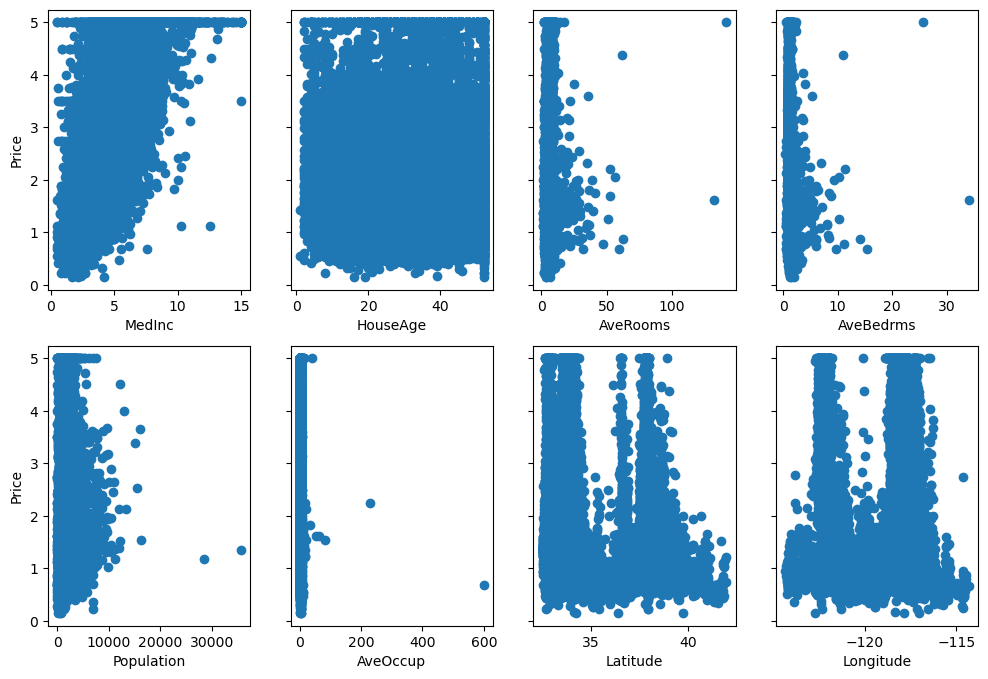

In [155]:
size = X.shape[0]
train_set = int(0.8 * size)
X_train = X[:train_set]
y_train = y[:train_set]

X_test = X[train_set:]
y_test = y[train_set:]

features = housing.feature_names

print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)
print("Features : ",features)

fig,ax=plt.subplots(2, 4,figsize=(12, 8), sharey=True)
plot_all_features(X_train,y_train,features,ax)

## Step 3: Feature Scaling
- Use `StandardScaler` to scale the data

Peak to Peak X_train :  [1.45e+01 5.10e+01 1.41e+02 3.37e+01 3.57e+04 5.99e+02 9.41e+00 1.00e+01]
Peak to Peak X_norm :  [  7.75   3.99  53.1   65.64  30.74 116.7    4.51   5.22]


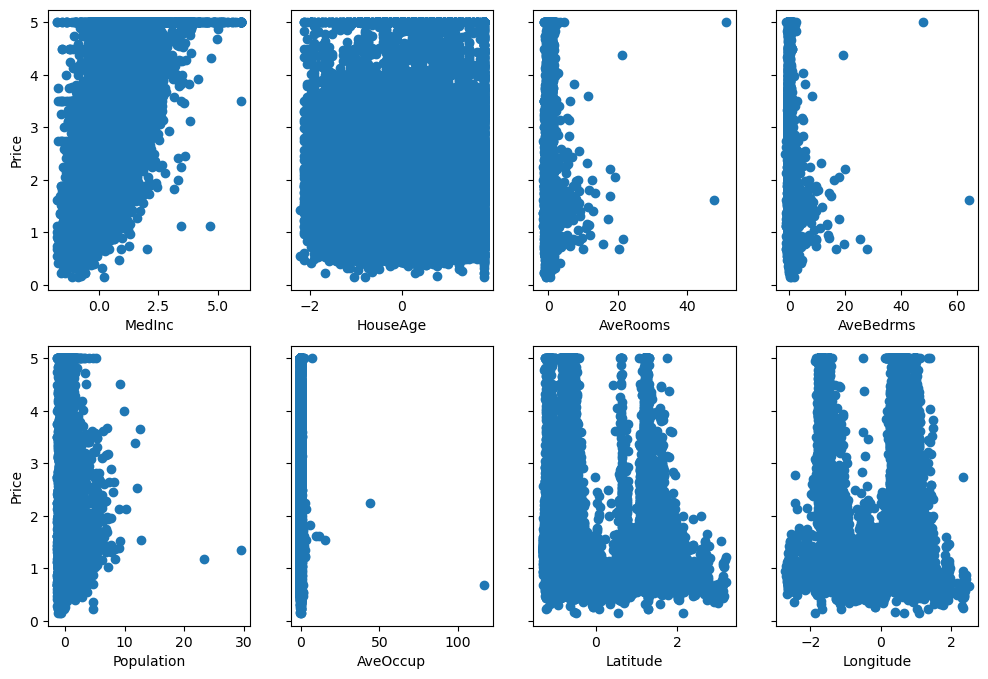

In [156]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print("Peak to Peak X_train : ", np.ptp(X_train,axis = 0))
print("Peak to Peak X_norm : ", np.ptp(X_norm,axis = 0))

fig,ax=plt.subplots(2, 4,figsize=(12, 8), sharey=True)
plot_all_features(X_norm,y_train,features,ax)

## Step 4: Model Training

- Create an instance of the LinearRegression model from sklearn.linear_model.
- Train the model by calling the .fit() method on the training data (X_train, y_train).

In [157]:
sgdr = SGDRegressor(max_iter=100)
# sgdr = Ridge(alpha=1.0)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

SGDRegressor(max_iter=100)
number of iterations completed: 6, number of weight updates: 99073.0
model parameters:                   w: [ 0.97 -0.12 -0.85  0.73 -0.24 -1.12 -0.95 -0.94], b:[1.98]


## Step 5: Making Predictions

- Use the trained model to make predictions on the testing data (X_test) by calling the .predict() method.



In [158]:
y_pred = sgdr.predict(X_norm)
print("Prediction value first 5 X_norm", y_pred[:5])

y_pred_test = sgdr.predict(X_test)
print("Prediction value first 5 X_test", y_pred_test[:5])

Prediction value first 5 X_norm [4.25 4.26 3.18 3.17 2.18]
Prediction value first 5 X_test [-246.68 -362.38 -344.12  -54.74 -296.59]


## Step 6: Model Evaluation

- Calculate the model's performance using an evaluation metric. For regression, a common and intuitive metric is the Root Mean Squared Error (RMSE).
- Compare the predictions (y_pred) to the actual values (y_test) to get the final error score.
- We will also visualize the predictions against the actual values in a scatter plot to get an intuitive feel for the model's accuracy.

In [159]:
rmse_train = root_mean_squared_error(y_train,y_pred)
rmse_test = root_mean_squared_error(y_test,y_pred_test)
print("RMSE train : ",rmse_train)
print("RMSE test : ",rmse_test)

RMSE train :  1.3511620260698238
RMSE test :  360.40301720029845


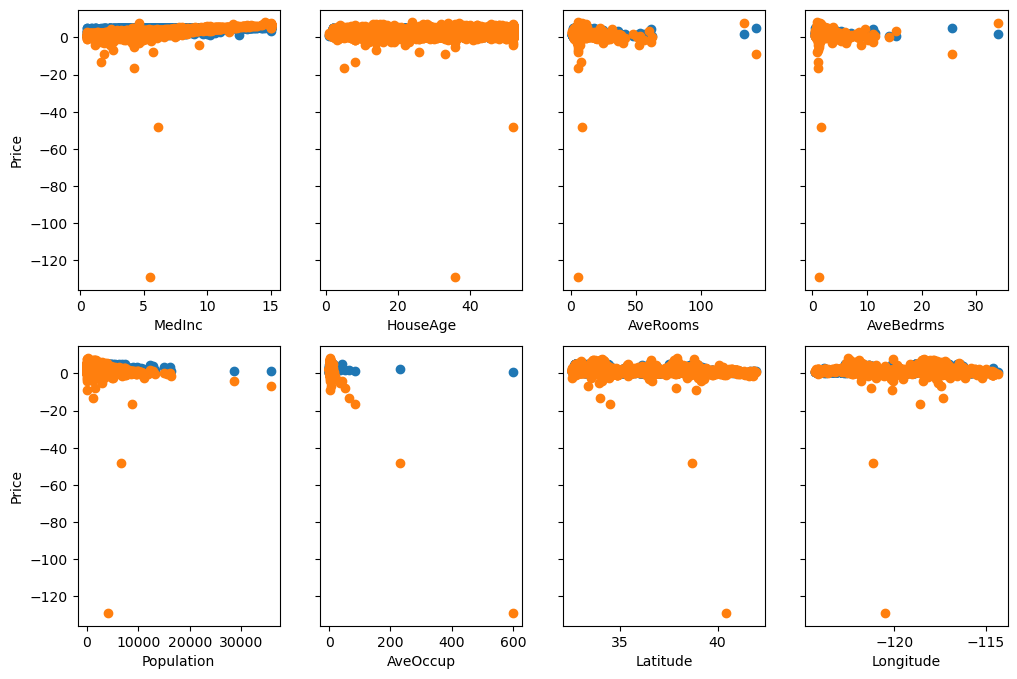

In [160]:
fig,ax=plt.subplots(2, 4,figsize=(12, 8), sharey=True)
# plt.ylim(0,6)
plot_all_features(X_train,y_train,features,ax)
plot_all_features(X_train,y_pred, features, ax,c="tab:orange")
plt.show()

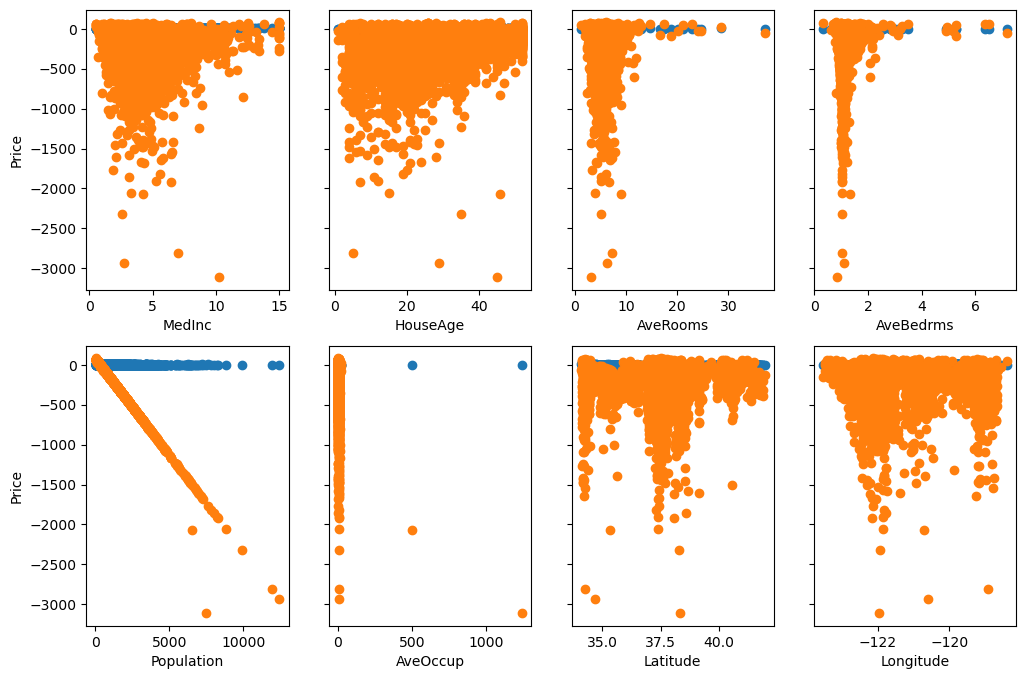

In [161]:
fig,ax=plt.subplots(2, 4,figsize=(12, 8), sharey=True)
# plt.ylim(0,6)
plot_all_features(X_test,y_test,features,ax)
plot_all_features(X_test,y_pred_test, features, ax,c="tab:orange")
plt.show()